## Teste Técnico - Programa Trainee triggo.ai 2025

This project is divided in 4 parts and each part have it's own particular questions:
- Data cleaning and modelling.
    - Importing the dataset .csv file from Kaggle ("olistbr/brazilian-ecommerce")
    - Data cleaning and normalizing
    - Creation of a relational data modelling
    - Describing each step in the data prep
- Exploratory analysis using SQL and Python
    - Orders volume per month and its seasonality
    - The distribution of orders delivery time
    - The relationship between delivery costs and delivery distance
    - Which are the best-selling products in revenue
    - Brazilian states with the highest average order value
- Solving Business Problems
    - Retention analysis of recurring customers (one or more orders in the analysis period) and which insights could we extract
    - Late delivery prediction analysis:
        - Define what a late delivery is.
        - Use relevant fields to create the features for the model
        - Divide train and test datasets
        - Implement the prediction analisys using Random Forest Classifier
        - Evaluate the model performance and explain the results
    - Customer Segmentation: 
        - Segment the customers in groups
        - Do a behavior analysis  of each group and suggest marketing strategies for each one.
    - Customer Satisfaction: 
        - Explore the relationship between customer review score and other aspects, like product category, delivery time, average order price.
        - Identify the factors that impact the most
- Visualization and Dashboarding
    - MoM Barchart of Orders filtered by Brazil States and Product Category
    - Heatmap of Orders by Region/Brazil States
    - Multiple graphs show the relationship between customer satisfaction and delivery time
    - A dashboard comparing different vendors with best performance in sales, customer satisfaction and delivery time

### Imports

In [1]:
import numpy as np
import pandas as pd
import duckdb
import kagglehub

import matplotlib.pyplot as plt
import seaborn as sns

c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Kaggle dataset download

In [2]:
# Download latest version
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Lucas\.cache\kagglehub\datasets\olistbr\brazilian-ecommerce\versions\2


### Reading the datasets into Pandas DataFrames

Listing all the 9 datasets and describing them:

- olist_customers_dataset.csv
    - Contains information about the customers
    - Raw column names: customer_id, customer_unique_id, customer_zip_code_prefix, customer_city and customer_state
- olist_geolocation_dataset.csv
    - Contains geolocalization information of every geolocation in the dataset
    - Raw column names: geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state
- olist_order_items_dataset.csv
    - Contains information about the customers
    - Raw column names: order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value
- olist_order_payments_dataset.csv
    - Contains information the orders payments
    - Raw column names: order_id, payment_sequential, payment_type, payment_installments, payment_value
- olist_order_reviews_dataset.csv
    - Contains information about the reviews from customers for every order
    - Raw column names: review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timest
- olist_orders_dataset.csv
    - Contains information about orders details
    - Raw column names: order_id,customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date,order_estimated_delivery_date
- olist_products_dataset
    - Contains information about products details
    - Raw column names: product_id, product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
- olist_sellers_dataset
    - Contains information about the sellers
    - Raw column names: seller_id, seller_zip_code_prefix, seller_city, seller_state
- product_category_name_translation
    - Contains name translations, wont be used in this project

## Table Diagram

![Table Diagram-2.png](<attachment:Table Diagram-2.png>)
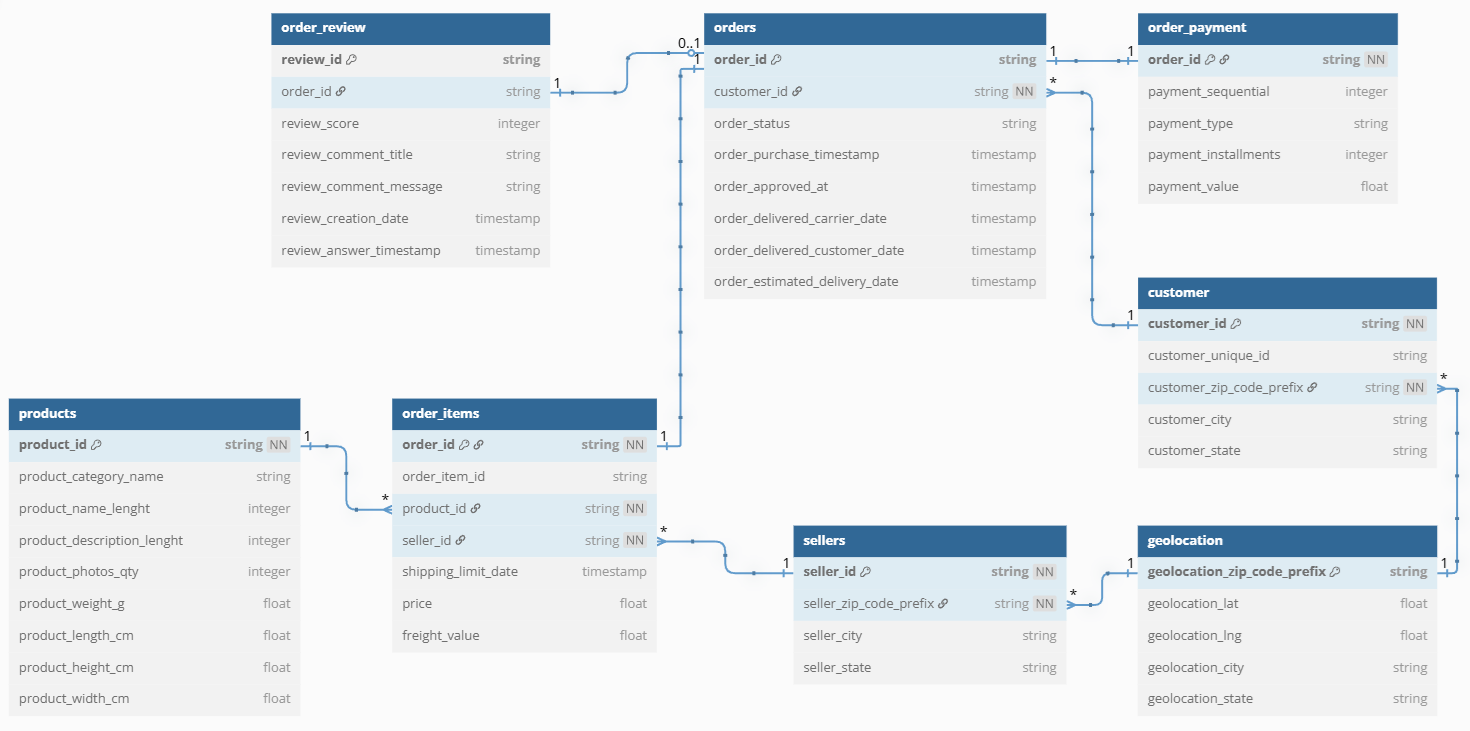

### Read the olist_customers_dataset.csv into df_customers


In [3]:
dtype = {'customer_zip_code_prefix': 'string'}

df_customers = pd.read_csv(path + "\olist_customers_dataset.csv", dtype=dtype)

df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Read the olist_geolocation_dataset.csv into df_geolocation


In [4]:
dtype = {'geolocation_zip_code_prefix': 'string'}

df_geolocation = pd.read_csv(path + "\olist_geolocation_dataset.csv", dtype=dtype)

df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,01037,-23.545621,-46.639292,sao paulo,SP
1,01046,-23.546081,-46.644820,sao paulo,SP
2,01046,-23.546129,-46.642951,sao paulo,SP
3,01041,-23.544392,-46.639499,sao paulo,SP
4,01035,-23.541578,-46.641607,sao paulo,SP


### Read the olist_order_items_dataset.csv into df_order_items


In [5]:
parse_dates = ['shipping_limit_date']

df_order_items = pd.read_csv(path + "\olist_order_items_dataset.csv", parse_dates=parse_dates)

df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Read the olist_order_payments_dataset.csv to df_order_payments


In [6]:
df_order_payments = pd.read_csv(path + "\olist_order_payments_dataset.csv")

df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Read the olist_order_reviews_dataset.csv to df_order_reviews


In [7]:
parse_dates = ['review_creation_date', 'review_answer_timestamp']

df_order_reviews = pd.read_csv(path + "\olist_order_reviews_dataset.csv", parse_dates=parse_dates)

df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


### Read the olist_orders_dataset.csv to df_orders


In [ ]:
parse_dates = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

df_orders = pd.read_csv(path + "\olist_orders_dataset.csv", parse_dates=parse_dates)

df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


### Read the olist_products_dataset.csv to df_products


In [9]:
df_products = pd.read_csv(path + "\olist_products_dataset.csv")

df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Read the olist_sellers_dataset.csv to df_sellers


In [10]:
dtype = {'seller_zip_code_prefix': 'string'}

df_sellers = pd.read_csv(path + "\olist_sellers_dataset.csv", dtype=dtype)

df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,04195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Orders volume per month and its seasonality

Here I used datetrunc to get the months of every date, then format with strftime, to get only a Month date. If datepart was used it would return an Integer instead of a String, so I prefer this way.

In [11]:
orders_per_month = duckdb.query(
                                    "SELECT \
                                        strftime(datetrunc('month', order_purchase_timestamp), '%m') AS month, \
                                        COUNT( order_id) AS count_orders \
                                    FROM df_orders \
                                    GROUP BY month \
                                    ORDER BY month"

                                ).df()

orders_per_month

,month,count_orders
0,01,8069
1,02,8508
2,03,9893
3,04,9343
4,05,10573
5,06,9412
6,07,10318
7,08,10843
8,09,4305
9,10,4959


### Months of August, May and July were the top 3 orders per months

Im using iloc to get the first and second columns

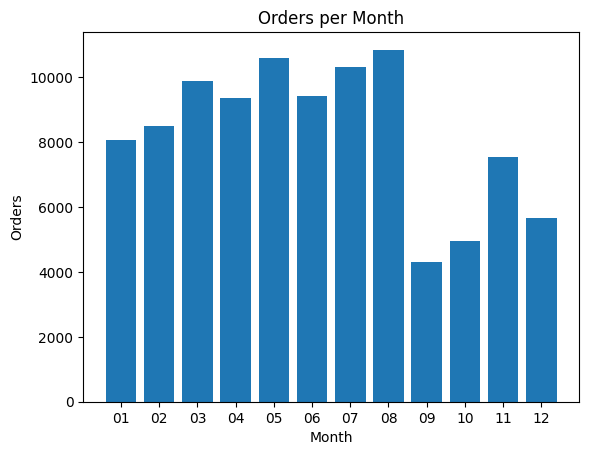

In [12]:
month = orders_per_month.iloc[:, 0]
count_orders = orders_per_month.iloc[:, 1]

plt.bar(month, count_orders)
plt.title('Orders per Month')
plt.xlabel('Month')
plt.ylabel('Orders')
plt.show()


### The Distribution of orders delivery time

To calculate the delivery time, Im using the order_delivered_customer_date as delivery time and the order_approved_at when the timer to the order be shipped

Calculating the mode of the dataset, to get the most frequent day to delivery

Selection only orders with the order_status = delivered

In [13]:
order_delivery_time = duckdb.query(
                                    "SELECT\
                                        order_id, \
                                        datediff('day', order_approved_at, order_delivered_customer_date) AS day_to_delivery \
                                    FROM df_orders \
                                    WHERE order_status = 'delivered'"

                                ).df()

print('Mode: ', order_delivery_time.day_to_delivery.mode())

Mode:  0    7
Name: day_to_delivery, dtype: Int64


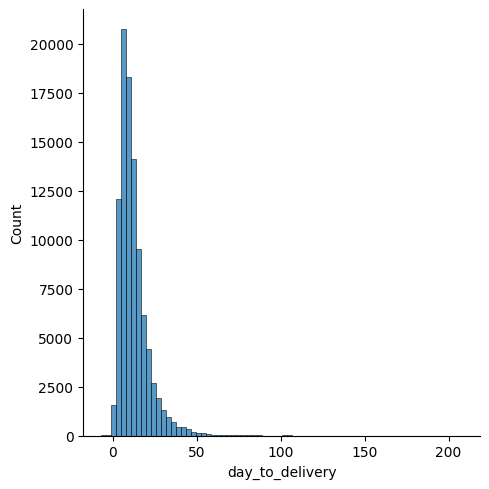

In [14]:
sns.displot(order_delivery_time, x="day_to_delivery", binwidth=3)

### SQL JOINs to get the right data from the multiple tables

- Starting with Customer table joining Geolocation table, to get the latitute and longitude from each customer
- As latitude and Longitude coulh have multiple values for each zip code, I decided to use the AVG function to get an average of each location
- Then joining Customer table with Orders table to get the order_id

In [22]:
customer_geo = duckdb.query(
"""
  SELECT
    c.customer_id,
    c.customer_zip_code_prefix,
    c.customer_city,
    c.customer_state,
    o.order_id,
    o.order_approved_at,
    o.order_delivered_customer_date,
    o.order_estimated_delivery_date,
    AVG(g.geolocation_lat) AS customer_lat,
    AVG(g.geolocation_lng) AS customer_lng
  FROM
    df_customers AS c
  INNER JOIN
    df_geolocation AS g
      ON c.customer_zip_code_prefix = g.geolocation_zip_code_prefix
      AND c.customer_city = g.geolocation_city
      AND c.customer_state = g.geolocation_state
  INNER JOIN 
    df_orders AS o
      ON c.customer_id = o.customer_id
      AND order_status = 'delivered'
  GROUP BY
    1,2,3,4,5,6,7,8
"""
).df()

customer_geo.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,customer_lat,customer_lng
0,d4b9d16bded480fb0da4e578e492b492,57210,piacabucu,AL,20c4ac55ded9c34a63cbf3e1f570afa4,2018-08-05 21:50:16,2018-08-20 20:09:38,2018-09-06,-10.405017,-36.427778
1,558d10ad25cf808e1f3e532951991954,57330,lagoa da canoa,AL,3ca6693c62bcb94cf84a1c9f89191483,2017-07-10 14:50:18,2017-08-25 15:09:29,2017-08-09,-9.827487,-36.741792
2,8a9003f36ee92e9312ee45a1280a0b7c,57305,arapiraca,AL,ac018e51985244ead60060db0a84f1ad,2018-03-11 17:15:31,2018-04-11 19:28:38,2018-04-11,-9.750486,-36.670255
3,8c55c34b514bc8c604b3552a140b5f13,57500,santana do ipanema,AL,469ebbc645e0d5bdfc7e2dc9c5a25f75,2018-01-05 02:35:26,2018-01-27 18:18:45,2018-02-23,-9.373149,-37.246308
4,92f45c696aa80b46ded933214002f0ed,57630,belem,AL,133f36e23b4b0a2f8ae2ddd6463ae161,2018-02-16 13:06:58,2018-03-09 21:06:41,2018-03-19,-9.583375,-36.470199


Joining the customer_geo table with df_order_items, to get some metrics and to join with df_products, to get products metrics, for usage in the freight calculation 

In [25]:

order_products = duckdb.query(
"""
  SELECT
    cg.customer_id,
    cg.customer_zip_code_prefix,
    cg.customer_city,
    cg.customer_state,
    cg.customer_lat,
    cg.customer_lng,
    cg.order_id,
    cg.order_approved_at,
    cg.order_delivered_customer_date,
    cg.order_estimated_delivery_date, 
    oi.seller_id,
    oi.product_id,
    oi.freight_value,
    p.product_category_name,
    p.product_height_cm,
    p.product_length_cm,
    p.product_width_cm,
    p.product_weight_g
  FROM 
    customer_geo AS cg
  INNER JOIN   
    df_order_items AS oi
      ON cg.order_id = oi.order_id
  INNER JOIN   
    df_products AS p
      ON oi.product_id = p.product_id
"""
).df()

order_products.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,order_id,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,seller_id,product_id,freight_value,product_category_name,product_height_cm,product_length_cm,product_width_cm,product_weight_g
0,9b5d68f669f7ed215f789471556529fe,22431,rio de janeiro,RJ,-22.982844,-43.224740,e8805f1923e711c407c454831b49643f,2017-04-06 02:42:41,2017-04-19 15:58:17,2017-05-02,0afccdb8a34ee5c79f7c06faf2b4d56e,80103e141ed0da3b1d63cb0c7d1f7d48,14.87,telefonia,17.0,17.0,17.0,150.0
1,5ca0847591cdad1a279fd89aa4e58e04,22230,rio de janeiro,RJ,-22.937298,-43.176890,e880a2a0f19dcb0f2ef51fed71ef34c9,2018-03-29 01:28:02,2018-04-24 19:17:22,2018-05-04,d1c281d3ae149232351cd8c8cc885f0d,37116a322ceabbe82c30430000af0db3,19.32,cama_mesa_banho,10.0,20.0,15.0,200.0
2,5ca0847591cdad1a279fd89aa4e58e04,22230,rio de janeiro,RJ,-22.937298,-43.176890,e880a2a0f19dcb0f2ef51fed71ef34c9,2018-03-29 01:28:02,2018-04-24 19:17:22,2018-05-04,d1c281d3ae149232351cd8c8cc885f0d,37116a322ceabbe82c30430000af0db3,19.32,cama_mesa_banho,10.0,20.0,15.0,200.0
3,7c5df4a2ffa11a657198a578c83fd58f,20520,rio de janeiro,RJ,-22.926259,-43.231846,e880c960b083af6aae64e809acf0693c,2017-07-14 00:23:56,2017-07-28 21:07:30,2017-08-09,4869f7a5dfa277a7dca6462dcf3b52b2,461f43be3bdf8844e65b62d9ac2c7a5a,15.86,relogios_presentes,14.0,20.0,16.0,444.0
4,7c5df4a2ffa11a657198a578c83fd58f,20520,rio de janeiro,RJ,-22.926259,-43.231846,e880c960b083af6aae64e809acf0693c,2017-07-14 00:23:56,2017-07-28 21:07:30,2017-08-09,4869f7a5dfa277a7dca6462dcf3b52b2,461f43be3bdf8844e65b62d9ac2c7a5a,15.86,relogios_presentes,14.0,20.0,16.0,444.0


- Joining the seller_df and the geolocation_df to get the seller localization
- Again, using the AVG function to get an average of each zip_code

In [26]:

seller_geo = duckdb.query(
"""
  SELECT
    s.seller_id,
    s.seller_zip_code_prefix,
    s.seller_city,
    s.seller_state,
    AVG(g.geolocation_lat) AS seller_lat,
    AVG(g.geolocation_lng) AS seller_lng
  FROM
    df_sellers AS s
  INNER JOIN
    df_geolocation AS g
      ON s.seller_zip_code_prefix = g.geolocation_zip_code_prefix
      AND s.seller_city = g.geolocation_city
      AND s.seller_state = g.geolocation_state
  GROUP BY
    1,2,3,4
"""
).df()

seller_geo.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng
0,fd435faa3c0422b60440ea3480d0e77c,58073,joao pessoa,PB,-7.167836,-34.856228
1,21c62b998a043ebe31161d38f84929fc,60110,fortaleza,CE,-3.735054,-38.516716
2,3da38366e7bd9baf6369071f782ecdf0,60346,fortaleza,CE,-3.723806,-38.590270
3,7ecd59e5e20407131822c1a68ac59c1f,70719,brasilia,DF,-15.783354,-47.887826
4,7b7ed56ae755e2880f2b69632e839c1e,74230,goiania,GO,-16.715056,-49.267867


- Joining the order_products with the seller_geo df to get the sellers data
- Joining order_products with the df_order_reviews, and get the review score
- Use the coalesce function to give a 0 to the review_score in case it was NULL (the customer didnt review)

In [27]:

orders_with_score = duckdb.query(
"""
  SELECT
    coalesce(r.review_score,0) AS review_score,
    customer_id,
    customer_zip_code_prefix,
    customer_city,
    customer_state,
    customer_lat,
    customer_lng,
    op.order_id,
    order_approved_at,
    order_delivered_customer_date,
    order_estimated_delivery_date,  
    product_id,
    freight_value,
    product_category_name,
    product_height_cm,
    product_length_cm,
    product_width_cm,
    product_weight_g,

    s.seller_id,
    s.seller_zip_code_prefix,
    s.seller_city,
    s.seller_state,
    seller_lat,
    seller_lng
  FROM
    order_products AS op
  INNER JOIN
    seller_geo AS s
      ON op.seller_id = s.seller_id
  LEFT JOIN
    df_order_reviews AS r
      ON op.order_id = r.order_id
"""
).df()

orders_with_score.head()

,review_score,customer_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,order_id,order_approved_at,order_delivered_customer_date,...,product_height_cm,product_length_cm,product_width_cm,product_weight_g,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng
0,3,3528b0f4fc89cd237f14b2ef3fa1530d,75930,maurilandia,GO,-17.978762,-50.340128,d6dae36830ffe3962efff0e91cc64127,2017-12-14 12:18:29,2018-01-03 16:40:33,...,11.0,19.0,20.0,500.0,850f4f8af5ea87287ac68de36e29107f,04367,sao paulo,SP,-23.651498,-46.667168
1,4,63469895c7367d40ce7a72e99d8347c9,13183,hortolandia,SP,-22.854438,-47.212780,d6db7f667096b9209c177893ddedb788,2017-11-29 21:17:10,2017-12-07 21:46:49,...,14.0,22.0,17.0,200.0,8b321bb669392f5163d04c59e235e066,01212,sao paulo,SP,-23.538663,-46.639925
2,4,137da6b7c6f269c569e4377b37b84242,79904,ponta pora,MS,-22.533178,-55.724120,d6dde74bdeb424af6b660214881b4845,2017-07-26 17:35:21,2017-08-07 20:32:34,...,2.0,44.0,35.0,1200.0,da8622b14eb17ae2831f4ac5b9dab84a,13405,piracicaba,SP,-22.708702,-47.664701
3,4,3c285e92488bf716f1ffa7380ad177c3,04216,sao paulo,SP,-23.596623,-46.600283,d6df2c35f7b163ef2a7bc19fa0151314,2018-02-24 14:28:01,2018-02-28 23:35:19,...,13.0,17.0,15.0,321.0,7bac63f6603d382cc8d0832eb6c100a8,05713,sao paulo,SP,-23.626403,-46.730381
4,5,6e6e4321afd3581094cef66e0880a859,13419,piracicaba,SP,-22.729029,-47.641148,d6df3e183721aa30b30577e1184eaa7f,2018-07-07 17:30:14,2018-07-11 14:42:25,...,2.0,16.0,11.0,250.0,6560211a19b47992c3666cc44a7e94c0,05849,sao paulo,SP,-23.652314,-46.755690
